In [202]:
from pathlib import Path
import pandas as pd
import os
import numpy as np
import matplotlib.mlab as mlab
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

In [203]:
def find_top_ten_verbs(df):
   plt.figure(figsize=(25,15))
   df = df[['Verb','Count']].sort_values(['Count'], ascending=False).head(15)
   df.plot.bar(x='Verb',y='Count')
   plt.show()


In [213]:
def find_converage(data):
    data_in_vn = data[(data['Is in VerbNet']==1)]
    data_in_fn = data[(data['Is in FrameNet']==1)]
    data_only_in_vn = data[(data['Is in VerbNet']==1) & (data['Is in FrameNet'] == 0)]
    data_only_in_fn = data[(data['Is in VerbNet']==0) & (data['Is in FrameNet'] == 1)]
    data_in_both = data[(data['Is in VerbNet']==1) | (data['Is in FrameNet'] == 1)]
    
    in_vn = len(data_in_vn)
    in_fn = len(data_in_fn)
    only_in_vn = len(data_only_in_vn)
    only_in_fn = len(data_only_in_fn)
    in_both    = len(data_in_both)
        
    return[in_vn,in_fn,only_in_vn,only_in_fn,in_both]
 

    
def avg_no_of_frames(data):
    total_frames_list = []
    for index, row in data.iterrows():
        frames_list = []
        frames = row['FN Frames']
        if not isinstance(frames,float):
            frames_list = frames.split(",")
        total_frames_list.append(len(frames_list))
        
    avg_no_of_frames = sum(total_frames_list) / len(total_frames_list)
    
    return avg_no_of_frames
    
def show_venn_diagram(only_in_1,only_in_2,in_both):
    venn2(subsets = (only_in_1, only_in_2, in_both), set_labels = ('Coverage by VerbNet', 'Coverage by FrameNet'))

In [214]:
def find_counts(data1,data2,data3,data4):
    total_unique_verbs1 = len(data1)
    total_unique_verbs2 = len(data2)
    total_unique_verbs3 = len(data3)
    total_unique_verbs4 = len(data4)
    
    total_instances1 = data1['Count'].sum()
    total_instances2 = data2['Count'].sum()
    total_instances3 = data3['Count'].sum()
    total_instances4 = data4['Count'].sum()
    
    avg_no_of_frames1 = avg_no_of_frames(data1)
    avg_no_of_frames2 = avg_no_of_frames(data2)
    avg_no_of_frames3 = avg_no_of_frames(data3)
    avg_no_of_frames4 = avg_no_of_frames(data4)

    [in_vn1,in_fn1,only_in_vn1,only_in_fn1,in_both1] = find_converage(data1)
    [in_vn2,in_fn2,only_in_vn2,only_in_fn2,in_both2] = find_converage(data2)
    [in_vn3,in_fn3,only_in_vn3,only_in_fn3,in_both3] = find_converage(data3)
    [in_vn4,in_fn4,only_in_vn4,only_in_fn4,in_both4] = find_converage(data4)
    
    coverage_by_vn1 = "%.2f" %((100*in_vn1)/total_unique_verbs1)+'%'
    coverage_by_vn2 = "%.2f" %((100*in_vn2)/total_unique_verbs2)+'%'
    coverage_by_vn3 = "%.2f" %((100*in_vn3)/total_unique_verbs3)+'%'
    coverage_by_vn4 = "%.2f" %((100*in_vn4)/total_unique_verbs4)+'%'
 
    coverage_by_fn1 = "%.2f" %((100*in_fn1)/total_unique_verbs1)+'%'
    coverage_by_fn2 = "%.2f" %((100*in_fn2)/total_unique_verbs2)+'%'
    coverage_by_fn3 = "%.2f" %((100*in_fn3)/total_unique_verbs3)+'%'
    coverage_by_fn4 = "%.2f" %((100*in_fn4)/total_unique_verbs4)+'%'
    
    coverage_by_both1 = "%.2f" %((100*in_both1)/total_unique_verbs1)+'%'
    coverage_by_both2 = "%.2f" %((100*in_both2)/total_unique_verbs2)+'%'
    coverage_by_both3 = "%.2f" %((100*in_both3)/total_unique_verbs3)+'%'
    coverage_by_both4 = "%.2f" %((100*in_both4)/total_unique_verbs4)+'%'
 

    df = pd.DataFrame(index =['Unique Verbs','Instances','Coverage by VN','Coverage by FN','Coverage by both','Avg No of Frames'],columns = ['PART 1','PART 2','PART 3','BOOK'])
    df.loc['Unique Verbs'] = [total_unique_verbs1,total_unique_verbs2,total_unique_verbs3,total_unique_verbs4]
    df.loc['Instances'] = [total_instances1,total_instances2,total_instances3,total_instances4]
    df.loc['Coverage by VN'] = [coverage_by_vn1,coverage_by_vn2,coverage_by_vn3,coverage_by_vn4]
    df.loc['Coverage by FN'] = [coverage_by_fn1,coverage_by_fn2,coverage_by_fn3,coverage_by_fn4]
    df.loc['Coverage by both'] = [coverage_by_both1,coverage_by_both2,coverage_by_both3,coverage_by_both4]
    df.loc['Avg No of Frames'] = [avg_no_of_frames1,avg_no_of_frames2,avg_no_of_frames3,avg_no_of_frames4]
    
    outdata = df.style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'black',                       
                                    'border-color': 'black'})
    
    display(outdata)
    
    show_venn_diagram(only_in_vn4,only_in_fn4,in_both4)
    



,PART 1,PART 2,PART 3,BOOK
Unique Verbs,36,28,44,54
Instances,212,159,304,674
Coverage by VN,97.22%,100.00%,93.18%,94.44%
Coverage by FN,97.22%,92.86%,97.73%,96.30%
Coverage by both,100.00%,100.00%,100.00%,100.00%
Avg No of Frames,9.58333,10,18.5,8.38889


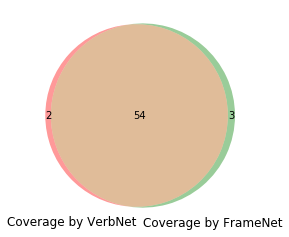

In [215]:

from pandas.io.formats.style import Styler

basepath = os.path.dirname(os.path.abspath('__file__'))
datapath1 = os.path.dirname(basepath)
datapath = os.path.dirname(datapath1)

#book = ['part1','part2','part3','book']
book = ['book']

readfile1 = datapath + '/results/hugh-murray/part1/geograhpic-path-extraction/part1-verbs-analysis.csv' # Input individual index files
readfile2 = datapath + '/results/hugh-murray/part2/geograhpic-path-extraction/part2-verbs-analysis.csv' # Input individual index files
readfile3 = datapath + '/results/hugh-murray/part3/geograhpic-path-extraction/part3-verbs-analysis.csv' # Input individual index files
readfile4 = datapath + '/results/hugh-murray/book/geograhpic-path-extraction/book-verbs-analysis.csv' # Input individual index files
    
data1 = pd.read_csv(readfile1,sep='\t', encoding='latin1',error_bad_lines=False)
data2 = pd.read_csv(readfile2,sep='\t', encoding='latin1',error_bad_lines=False)
data3 = pd.read_csv(readfile3,sep='\t', encoding='latin1',error_bad_lines=False)
data4 = pd.read_csv(readfile4,sep='\t', encoding='latin1',error_bad_lines=False)
    
find_counts(data1,data2,data3,data4)


    

<Figure size 1800x1080 with 0 Axes>

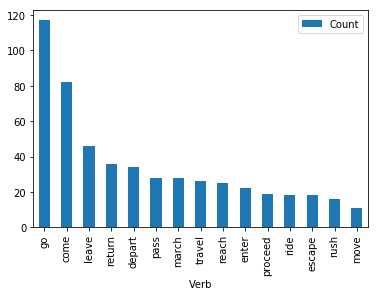

In [201]:
find_top_ten_verbs(data)